## Import Packages

In [7]:
import numpy as np
from numpy import asarray
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import ntpath
import xgboost as xgb
from xgboost import XGBRegressor
print(xgb.__version__)
my_seed = 64
tf.random.set_seed(my_seed)
np.random.seed(my_seed)

1.3.3


## Import CSVs

In [8]:
ROOT_DIR = os.path.abspath(os.curdir)
path = ROOT_DIR + '\\..\\..\\Datasets\\processed\\regression_10d'
print(path)

csvfiles = glob.glob(path + "/*.csv")
dfs = []

for file in csvfiles:
    df = pd.read_csv(file)
    df.name = ntpath.basename(file)
    dfs.append(df)

df = dfs[15]
print("Stock: ")
print(df.name)

C:\Users\Dell\Documents\B.Sc IT (Hons.) Computing and Business\FYP - Luke Bezzina\Code\mlpLearning\..\..\Datasets\processed\regression_10d
Stock: 
NFLX.csv


# Splitting dataset in dependent and independent variables

In [9]:
x = np.array(df.iloc[:, 1:-1].values, dtype=np.float)
y = np.array(df.iloc[:, -1:].values)


# Splitting dataset (training + testing)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=32)

print("Train - Independent Variables")
print(x_train)
print("Test - Independent Variables")
print(x_test)

Train - Independent Variables
[[ 1.92000000e+00  4.32000000e+00  3.58000000e+00 ...  5.58257163e-02
   1.52473735e+00  1.33260000e+02]
 [ 2.40000000e+00  1.66000000e+00  1.54000000e+00 ...  1.55572339e-01
   2.50480019e+00  1.38410000e+02]
 [-7.40000000e-01 -8.60000000e-01 -1.92000000e+00 ...  1.11526436e-01
   3.15276783e+00  1.38600000e+02]
 ...
 [ 1.20200000e+01 -2.60000000e-01  1.47600000e+01 ...  2.53620543e-02
   2.04437141e+01  3.36300000e+02]
 [-1.22800000e+01  2.74000000e+00 -8.27000000e+00 ...  5.03274666e-02
   2.56801519e+01  2.98840000e+02]
 [ 1.50200000e+01  4.01000000e+00  2.00000000e-01 ...  5.24849174e-02
   2.63979707e+01  3.19750000e+02]]
Test - Independent Variables
[[-1.10100000e+01 -1.48200000e+01 -3.73000000e+01 ...  8.28724745e-02
   2.44010516e+01  3.15470000e+02]
 [-3.81000000e+00 -2.62900000e+01 -8.65000000e+00 ...  5.64515671e-02
   2.16296890e+01  3.32030000e+02]
 [-2.24800000e+01 -4.84000000e+00 -1.90500000e+01 ...  5.93023591e-02
   1.83792619e+01  3.3283

# Predicting using XGBoost Algorithm

In [11]:
def model_fitting(train, labels):
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, random_state=my_seed)
    model.fit(asarray(train), asarray(labels))
    return model

# Predicting Test Set Results

In [12]:
y_pred = []
train = [x for x in x_train]
labels = [y for y in y_train]


for index, row in enumerate(x_test):
    model = model_fitting(train, labels)
    y_pred_val = model.predict(asarray([row]))
    y_pred.append(y_pred_val)
    train.append(row)
    labels.append(y_test[index])
    print(y_test[index])

y_pred = np.array(y_pred)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[332.03]
[332.83]
[360.27]
[357.32]
[342.39]
[362.99]
[357.12]
[370.96]
[375.5]
[364.08]
[370.08]
[361.76]
[379.96]
[372.28]
[371.12]
[370.72]
[396.72]
[413.55]
[426.75]
[439.17]
[422.96]
[437.49]
[433.83]
[421.42]
[426.7]
[424.99]
[421.38]
[403.83]
[411.89]
[419.85]
[415.27]
[428.15]
[424.68]
[434.26]
[436.53]
[435.55]
[440.52]
[431.82]
[438.27]
[441.95]
[454.19]
[452.58]
[451.04]
[447.67]
[436.25]
[429.32]
[414.77]
[419.89]
[413.44]
[419.73]
[425.92]
[427.31]
[421.97]
[414.33]
[419.6]
[419.49]
[434.05]
[434.48]
[425.56]
[418.07]
[425.5]
[436.13]
[447.77]
[449.87]
[453.72]
[468.04]
[466.26]
[457.85]
[465.91]
[443.4]
[447.24]
[455.04]
[485.64]
[476.89]
[493.81]
[493.16]
[502.78]
[507.76]
[548.73]
[525.5]
[524.88]
[523.26]
[527.39]
[492.99]
[502.41]
[490.1]
[489.82]
[477.58]
[480.45]
[495.65]
[488.51]
[484.48]
[485.8]
[488.88]
[498.62]
[509.64]
[502.11]
[509.08]
[494.73]
[483.38]
[466.93]
[475.47]
[481.33]
[482.68]
[482.35]
[491.87]
[484.53]
[497.9]
[492.31]
[488.81]
[490.58]
[547.53]
[

# Obtaining Confusion Matrix and Accuracy Score for predictions

In [13]:
from sklearn.metrics import mean_absolute_error


print()
print("Mean Absolute Error: ")
mean_absolute_error(y_test, y_pred)


Mean Absolute Error: 


11.79177583618164

# Classifying results

In [14]:
prediction_arr = []
actuals_arr = []
neutral_percentage = 0.002

for i in range(1, len(y_pred)):
    if y_pred[i] - y_test[i-1] > (y_pred[i] * neutral_percentage):
            prediction_arr.append([1,0,0])
    elif y_pred[i] - y_test[i-1]  < - (y_pred[i] * neutral_percentage):
            prediction_arr.append([0,0,1])
    else:
            prediction_arr.append([0,1,0])

for i in range(1, len(y_test)):
    if y_test[i] - y_test[i-1] > (y_test[i] * neutral_percentage):
            actuals_arr.append([1,0,0])
    elif y_test[i] - y_test[i-1]  < - (y_test[i] * neutral_percentage):
            actuals_arr.append([0,0,1])
    else:
            actuals_arr.append([0,1,0])

actuals_arr = np.array(actuals_arr)
prediction_arr = np.array(prediction_arr)

# Results

In [15]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

# Confusion Matrix: Columns = 0, 1 (Predicted Label)
# Confusion Matrix: Rows = 0, 1 (Actual Label)
cm = multilabel_confusion_matrix(np.argmax(actuals_arr, axis=1), np.argmax(prediction_arr, axis=1))
print(cm)
print()

print("Accuracy Score: ")
accuracy_score(actuals_arr, prediction_arr)

[[[ 79  20]
  [ 61  39]]

 [[165  17]
  [ 16   1]]

 [[ 59  58]
  [ 18  64]]]

Accuracy Score: 


0.5226130653266332

# Graphs

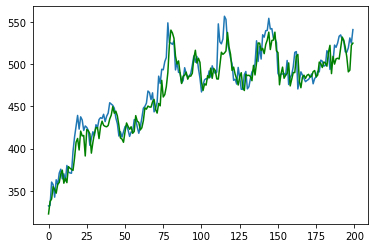

In [16]:
test_nos = []
for i, val in enumerate(y_test):
    test_nos.append(i)
plt.plot(test_nos, y_test)
plt.plot(test_nos, y_pred, color='green')